# Enter Cats vs. Dogs Redux competition
To-Do:  
1.Create validation and sample set  
2.Move images to appropriate directories  
3.Finetune and train  
4.Submit  

In [1]:
import theano
from theano.sandbox import cuda
theano.sandbox.cuda.use("gpu0")

/home/irashadow/.pyenv/versions/miniconda-3.9.1/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:541: UserWarning: Theano flag device=gpu* (old gpu back-end) only support floatX=float32. You have floatX=float64. Use the new gpu back-end with device=cuda* for that value of floatX.
  warnings.warn(msg)
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 4007)


In [2]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


In [3]:
batch_size = 64

In [11]:
#%pwd
#%cd ../data/DogAndCat/train/
#%cd ..
#%mkdir valid
%cd train/
%pwd

/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/train


u'/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/train'

In [12]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], '../valid/'+shuf[i])

In [13]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [14]:
from shutil import copyfile

In [15]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], '../sample/train/'+shuf[i])

In [16]:
%cd ../valid

/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/valid


In [ ]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], '../sample/valid/'+shuf[i])
    

# Move to separate dirs for each set

In [20]:
%cd ~/python_workspace/deep_learning_workspace/keras_workspace/
#%cd ../data/DogAndCat/train
%cd ../data/DogAndCat/sample/valid/

/home/irashadow/python_workspace/deep_learning_workspace/keras_workspace
/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/sample/valid


In [21]:
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

# Fintune and Train


In [5]:
%pwd
path = '/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/'

In [6]:
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()

/home/irashadow/.pyenv/versions/miniconda-3.9.1/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [8]:
batches = vgg.get_batches(path+'train', batch_size = batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size = batch_size*2)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
23000/23000 [==============================] - 603s - loss: 0.1174 - acc: 0.9695 - val_loss: 0.0513 - val_acc: 0.9850


In [ ]:
vgg.model.save_weights(path+'results/ft1.h5')

# Run a few more epochs....

In [30]:
#vgg.model.optimizer.lr = 0.01
vgg.fit(batches, val_batches, nb_epoch = 3)
vgg.model.save_weights(path+'results/ft2.h5')


AttributeError: 'Sequential' object has no attribute 'optimizer'

# Submit

In [4]:
%pwd
path = '/home/irashadow/python_workspace/deep_learning_workspace/data/DogAndCat/'

In [5]:
from vgg16 import Vgg16
vgg = Vgg16()
vgg.model.load_weights(path+'results/ft1.h5')

/home/irashadow/.pyenv/versions/miniconda-3.9.1/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [6]:
batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [ ]:
filenames = batches.filenames

In [16]:
preds[:5]

array([[  6.9188e-06,   9.9999e-01],
       [  1.0000e+00,   1.5663e-08],
       [  1.0000e+00,   1.1774e-08],
       [  4.2354e-07,   1.0000e+00],
       [  1.9075e-06,   1.0000e+00]], dtype=float32)

In [17]:
filenames[:5]

array(['unknown/10000.jpg', 'unknown/10001.jpg', 'unknown/10002.jpg', 'unknown/10003.jpg',
       'unknown/10004.jpg'], 
      dtype='|S17')

In [18]:
save_array(path+'results/test_preds.dat', preds)
save_array(path+'results/filenames.dat', filenames)

In [19]:
preds = load_array(path+'results/test_preds.dat')
filenames = load_array(path+'results/filenames.dat')

In [20]:
from PIL import Image
#Image.open(path+'test/'+filenames[0])

In [21]:
isdog = preds[:,1]
isdog[:5]

array([  9.9999e-01,   1.5663e-08,   1.1774e-08,   1.0000e+00,   1.0000e+00], dtype=float32)

In [22]:
isdog = np.clip(preds[:,1], 0.02, 0.98)

In [23]:
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[10000, 10001, 10002, 10003, 10004]

In [25]:
subm = np.stack([ids,isdog], axis = 1)
subm[:5]

array([[  1.0000e+04,   9.8000e-01],
       [  1.0001e+04,   2.0000e-02],
       [  1.0002e+04,   2.0000e-02],
       [  1.0003e+04,   9.8000e-01],
       [  1.0004e+04,   9.8000e-01]])

In [26]:
np.savetxt(path+'submission/subm98.csv',subm, fmt='%d,%.5f', header = 'id,label', comments='')

In [29]:
#from Ipython.display import FileLink
#FileLink(path+'submission/subm98.csv')

# Visualzing results
As well as looking at the overall metrics, it's also a good idea to look at examples of each of:  
1. A few correct labels at random  
2. A few incorrect labels at random  
3. The most correct labels of each class (ie those with highest probability that are correct)  
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)  
5. The most uncertain labels (ie those with probability closest to 0.5).  

In [31]:
vgg.model.load_weights(path+'results/ft1.h5')

In [32]:
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [48]:
val_labels = val_batches.classes
filenames = val_batches.filenames

In [ ]:
probs = probs[:,0]

In [36]:
preds = np.round(1-probs)
probs[:8]

array([ 1.    ,  1.    ,  0.9974,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ], dtype=float32)

In [37]:
preds[:8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [43]:
n_view = 4

In [39]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

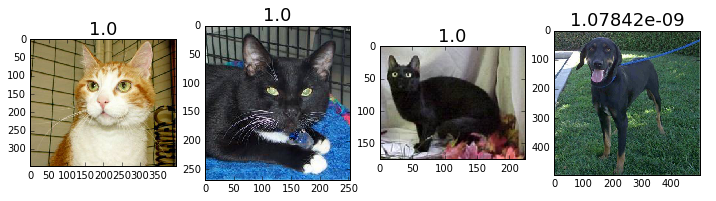

In [49]:
#1. A few correct labels at random
correct = np.where(preds==val_labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

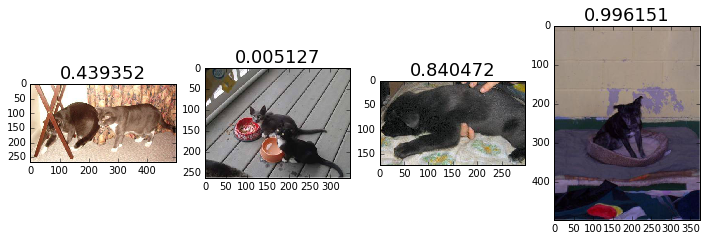

In [50]:
#2. A few incorrect labels at random
incorrect = np.where(preds!=val_labels)[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

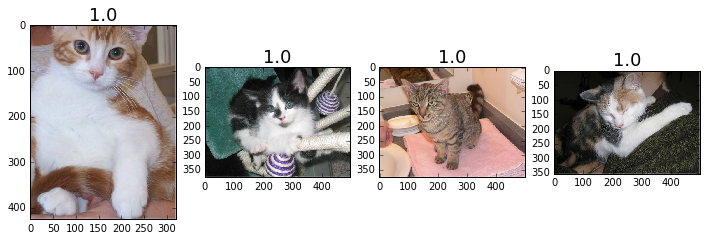

In [51]:
#3. The images we most confident were cats, and are actually cats
correct_cats = np.where((preds==0) & (preds==val_labels))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

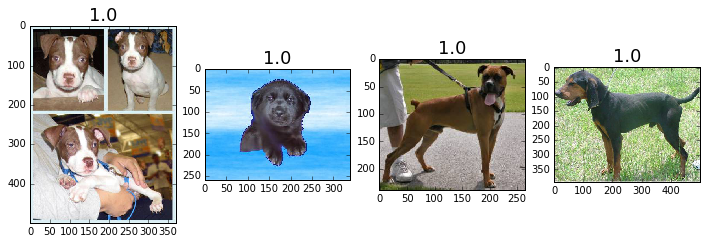

In [52]:
# as above, but dogs
correct_dogs = np.where((preds==1) & (preds==val_labels))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], 1-probs[correct_dogs][most_correct_dogs])

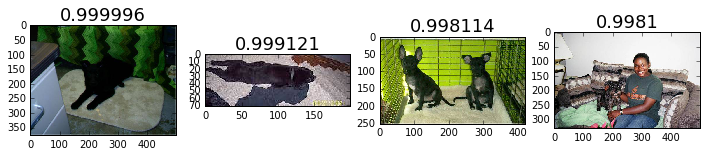

In [53]:
#3. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((preds==0) & (preds!=val_labels))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

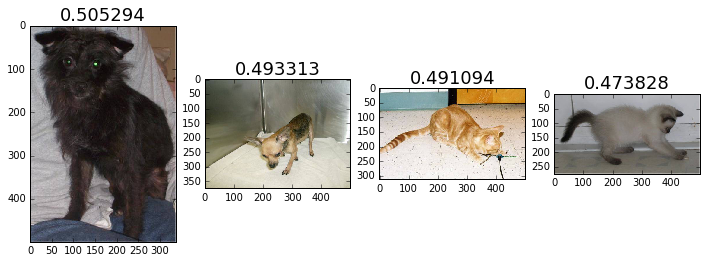

In [54]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [56]:
cm = confusion_matrix(val_labels, preds)

[[1037   10]
 [  20  933]]


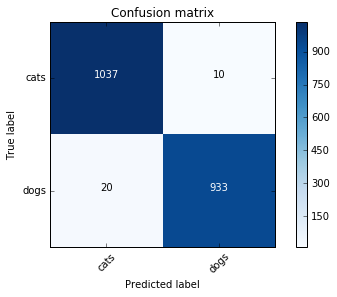

In [57]:
plot_confusion_matrix(cm, val_batches.class_indices)